In [31]:
#first, import the data from CSV, and

import pandas as pd
from matplotlib import colors
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Specify the file path
file_path = 'shopping_trends.csv'

# Read the Excel file into a DataFrame
data = pd.read_csv(file_path)

data.drop('Customer ID', axis=1, inplace=True)

# Print the DataFrame to verify the new column
def categorize_brightness(color):
    # You can adjust the criteria based on your preference
    old_people_colors = ['black', 'Gray', 'Charcoal', 'Silver', 'Lavender', 'Maroon', 'Beige', 'Brown']
    return 1 if color in old_people_colors else 0
# Create a new column 'brightness' based on bright or dim categories
data['Older Color'] = data['Color'].apply(categorize_brightness)



# encoded_colors = pd.get_dummies(data['Color'])
# data = pd.concat([data, encoded_colors], axis=1)

encoded_gender = pd.get_dummies(data['Gender'])
data = pd.concat([data, encoded_gender], axis=1)

encoded_item = pd.get_dummies(data['Item Purchased'])
data = pd.concat([data, encoded_item], axis=1)

econded_category = pd.get_dummies(data['Category'])
data = pd.concat([data, econded_category], axis=1)

econded_location = pd.get_dummies(data['Location'])
data = pd.concat([data, econded_location], axis=1)

econded_size = pd.get_dummies(data['Size'])
data = pd.concat([data, econded_size], axis=1)

econded_season = pd.get_dummies(data['Season'])
data = pd.concat([data, econded_season], axis=1)


In [32]:
data.corr()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Older Color,Female,Male,Backpack,Belt,Blouse,...,Wisconsin,Wyoming,L,M,S,XL,Fall,Spring,Summer,Winter
Age,1.000000,0.012214,-0.010206,0.040022,0.141548,0.000302,-0.000302,-0.019840,-0.015171,-0.002775,...,0.011560,-0.011978,0.011397,0.004603,-0.003650,-0.019108,-0.007202,0.022382,-0.009268,-0.006165
Purchase Amount (USD),0.012214,1.000000,0.030776,0.008063,-0.001815,0.014044,-0.014044,0.005167,0.000704,0.010063,...,-0.022573,0.005323,-0.030847,0.006106,0.024334,0.004848,0.043701,-0.025439,-0.032681,0.014417
Review Rating,-0.010206,0.030776,1.000000,0.004229,0.002366,-0.008164,0.008164,0.000681,0.003344,-0.019832,...,0.027776,-0.010569,0.002342,-0.039267,0.027341,0.026288,-0.016124,0.033304,-0.019318,0.001739
Previous Purchases,0.040022,0.008063,0.004229,1.000000,0.017783,-0.035873,0.035873,-0.024109,-0.018255,0.019756,...,-0.023183,0.027223,0.015026,-0.002924,-0.017913,0.004833,-0.015239,-0.009564,0.002241,0.022686
Older Color,0.141548,-0.001815,0.002366,0.017783,1.000000,-0.002409,0.002409,-0.013809,0.024491,0.030056,...,0.001124,-0.011258,-0.028489,0.025239,0.005708,-0.006560,-0.009931,-0.008057,0.020037,-0.001849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XL,-0.019108,0.004848,0.026288,0.004833,-0.006560,-0.005762,0.005762,-0.007543,0.005314,0.008765,...,-0.001492,0.007294,-0.213807,-0.317999,-0.159106,1.000000,-0.006151,0.003961,-0.022964,0.024997
Fall,-0.007202,0.043701,-0.016124,-0.015239,-0.009931,0.020311,-0.020311,-0.005514,0.002232,-0.002169,...,0.014013,0.009966,-0.004335,0.000298,0.009853,-0.006151,1.000000,-0.338804,-0.328775,-0.332422
Spring,0.022382,-0.025439,0.033304,-0.009564,-0.008057,-0.004634,0.004634,0.007407,-0.000711,0.006305,...,-0.039400,-0.000821,-0.018166,0.002893,0.014340,0.003961,-0.338804,1.000000,-0.334170,-0.337877
Summer,-0.009268,-0.032681,-0.019318,0.002241,0.020037,-0.009715,0.009715,0.031674,-0.001272,0.003282,...,0.024465,-0.028482,-0.001142,0.018278,-0.003730,-0.022964,-0.328775,-0.334170,1.000000,-0.327875


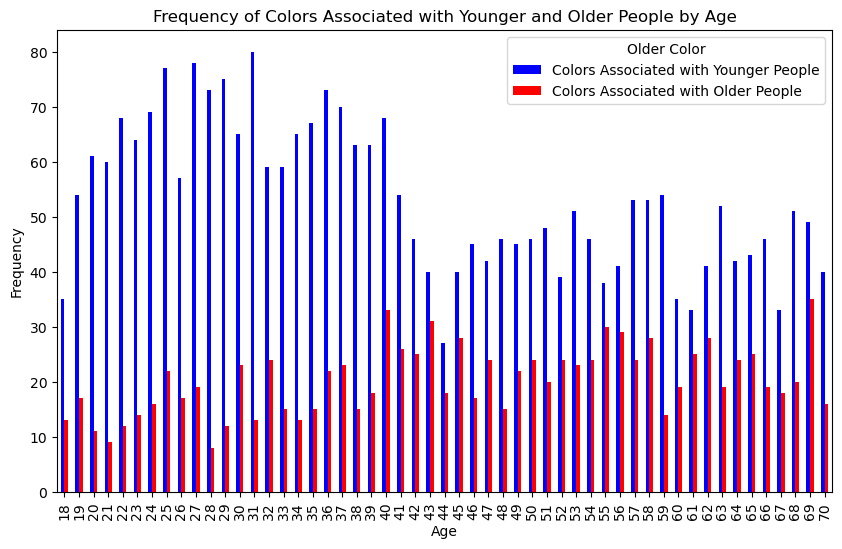

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data is your dataframe containing the 'Older Color' and 'age' columns
# The dataframe should already have a column 'Older Color' with values 0 and 1

# Group the dataframe by 'age' and count the frequency of 'Older Color' values
grouped_data = data.groupby('Age')['Older Color'].value_counts().unstack().fillna(0)

# Plot a histogram of the frequency of 'Older Color' grouped by age
grouped_data.plot(kind='bar', color=['blue', 'red'], figsize=(10, 6))

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency of Colors Associated with Younger and Older People by Age')

# Add legend
plt.legend(title='Older Color', labels=['Colors Associated with Younger People', 'Colors Associated with Older People'])

# Display the plot
plt.show()

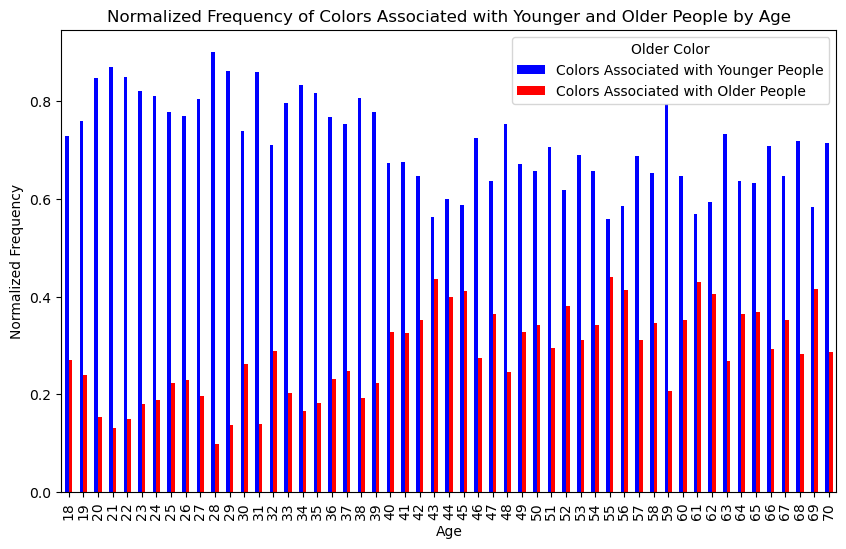

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the 'Older Color' and 'Age' columns

# Group the dataframe by 'Age' and count the frequency of 'Older Color' values
grouped_data = data.groupby('Age')['Older Color'].value_counts().unstack().fillna(0)

age_counts = data.groupby('Age').size()


#print(grouped_data.count(axis=1))
# Normalize the counts by the number of rows for each age group
# Correct normalization
grouped_data = grouped_data.divide(grouped_data.sum(axis=1), axis=0)



# Plot a bar chart of the normalized frequency of 'Older Color' grouped by age
grouped_data.plot(kind='bar', color=['blue', 'red'], figsize=(10, 6))

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Normalized Frequency')
plt.title('Normalized Frequency of Colors Associated with Younger and Older People by Age')

# Add legend
plt.legend(title='Older Color', labels=['Colors Associated with Younger People', 'Colors Associated with Older People'])

# Display the plot
plt.show()

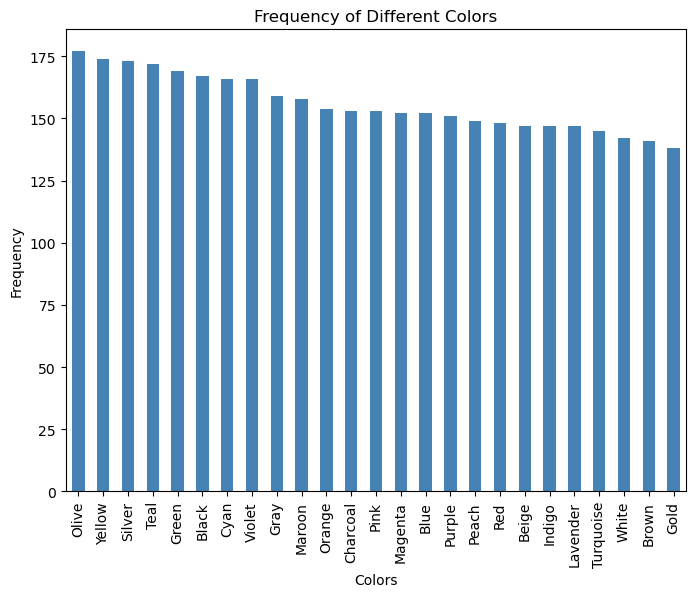

In [35]:
# Calculate the frequency of each color
color_counts = data['Color'].value_counts()

# Plot a bar chart of the frequency of colors
plt.figure(figsize=(8, 6))
color_counts.plot(kind='bar', color='steelblue')

# Add labels and title
plt.xlabel('Colors')
plt.ylabel('Frequency')
plt.title('Frequency of Different Colors')

# Display the plot
plt.show()

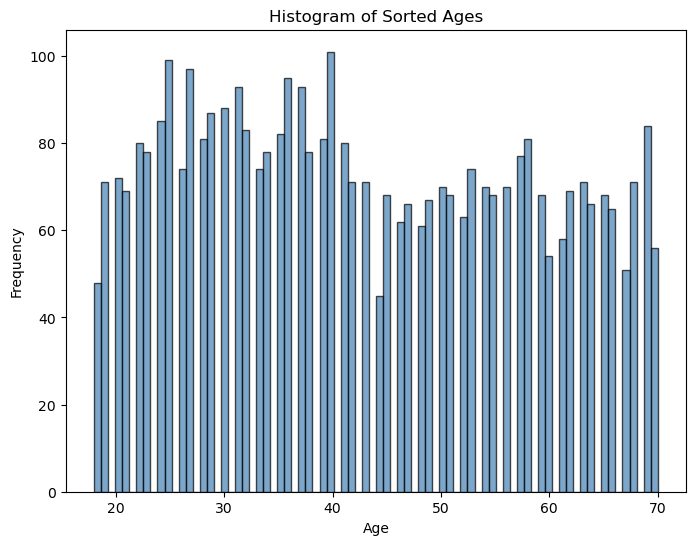

In [36]:
# Sort the dataframe by the 'age' column
data_sorted = data.sort_values('Age')

# Plot a histogram of the sorted 'age' column
plt.figure(figsize=(8, 6))
plt.hist(data_sorted['Age'], bins=80, color='steelblue', alpha=0.7, edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Sorted Ages')

# Display the plot
plt.show()

In [37]:
new_data = pd.DataFrame(data)
new_data = new_data.drop("Gender", axis = 1)
new_data = new_data.drop("Item Purchased", axis = 1)
new_data = new_data.drop("Category", axis = 1)
new_data = new_data.drop("Location", axis = 1)
new_data = new_data.drop("Size", axis = 1)
new_data = new_data.drop("Color", axis = 1)
new_data = new_data.drop("Season", axis = 1)
new_data = new_data.drop("Subscription Status", axis = 1)
new_data = new_data.drop("Shipping Type", axis = 1)
new_data = new_data.drop("Discount Applied", axis = 1)
new_data = new_data.drop("Promo Code Used", axis = 1)
new_data = new_data.drop("Payment Method", axis = 1)
new_data = new_data.drop("Frequency of Purchases", axis = 1)
new_data = new_data.drop("Older Color", axis = 1)
print(new_data)

      Age  Purchase Amount (USD)  Review Rating  Previous Purchases  Female  \
0      53                     53            3.1                  14       0   
1      19                     64            3.1                   2       0   
2      50                     73            3.1                  23       0   
3      21                     90            3.5                  49       0   
4      45                     49            2.7                  31       0   
...   ...                    ...            ...                 ...     ...   
3895   40                     28            4.2                  32       1   
3896   31                     49            4.5                  41       1   
3897   46                     33            2.9                  24       1   
3898   44                     77            3.8                  24       1   
3899   52                     81            3.1                  33       1   

      Male  Backpack  Belt  Blouse  Boots  ...  Wis

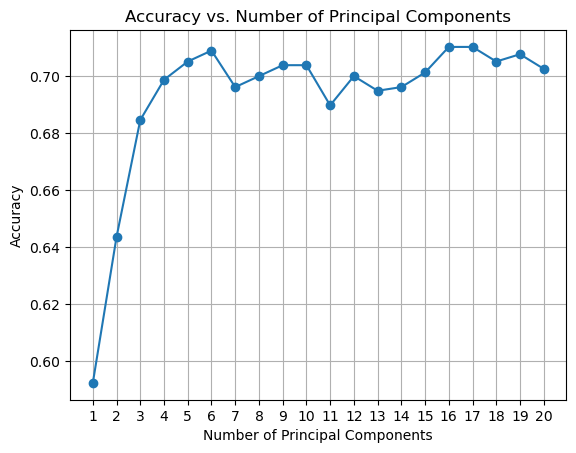

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define lists to store the accuracy values and the corresponding num_components values
num_components_values = list(range(1, 21))
accuracies = []
x = new_data
# Loop over the range of num_components values
for num_components in num_components_values:
    # Create the PCA object with the current num_components
    pca = PCA(n_components=num_components)
    
    # Fit and transform the data using PCA
    principalComponents = pca.fit_transform(x)
    
    # Create a DataFrame for the principal components
    principal_component_columns = [f'Principal Component {i}' for i in range(1, num_components + 1)]
    principalDf = pd.DataFrame(data=principalComponents, columns=principal_component_columns)
    
    # Define the features and target variables
    features = principalDf
    target = data['Older Color']
    
    # Standardize the features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)
    
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
  

# Plot the accuracies as a function of num_components
plt.figure()
plt.plot(num_components_values, accuracies, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Principal Components')

xtick_positions = list(range(1, 21))
plt.xticks(xtick_positions)

plt.grid(True)
plt.show()


In [39]:
#lets try and analyze the data without running PCA as well; what accuracy can be deduced?
target = data['Older Color']

features = new_data
    
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
    
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)
    
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
    
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)



0.7115384615384616


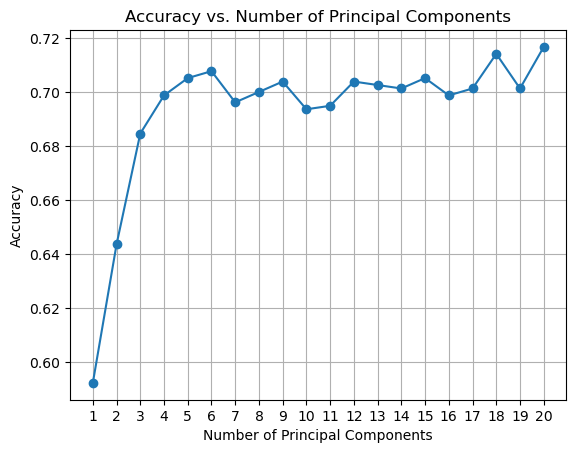

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

NameError: name 'confusion_matrix' is not defined

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define lists to store the accuracy values and the corresponding num_components values
num_components_values = list(range(1, 21))
accuracies = []
x = new_data
# Loop over the range of num_components values
for num_components in num_components_values:
    # Create the PCA object with the current num_components
    pca = PCA(n_components=num_components)
    
    # Fit and transform the data using PCA
    principalComponents = pca.fit_transform(x)
    
    # Create a DataFrame for the principal components
    principal_component_columns = [f'Principal Component {i}' for i in range(1, num_components + 1)]
    principalDf = pd.DataFrame(data=principalComponents, columns=principal_component_columns)
    
    # Define the features and target variables
    features = principalDf
    target = data['Older Color']
    
    # Standardize the features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)
    
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the accuracies as a function of num_components
plt.figure()
plt.plot(num_components_values, accuracies, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Principal Components')

xtick_positions = list(range(1, 21))
plt.xticks(xtick_positions)

plt.grid(True)
plt.show()
print(y_pred)
print(confusion_matrix(y_test, y_pred))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Define lists to store the accuracy values and the corresponding num_components values
num_components_values = list(range(1, 21))
accuracies = []
x = new_data
# Loop over the range of num_components values
for num_components in num_components_values:
    # Create the PCA object with the current num_components
    pca = PCA(n_components=num_components)
    
    # Fit and transform the data using PCA
    principalComponents = pca.fit_transform(x)
    
    # Create a DataFrame for the principal components
    principal_component_columns = [f'Principal Component {i}' for i in range(1, num_components + 1)]
    principalDf = pd.DataFrame(data=principalComponents, columns=principal_component_columns)
    
    # Define the features and target variables
    features = principalDf
    target = data['Older Color']
    
    # Standardize the features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)
    
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the accuracies as a function of num_components
plt.figure()
plt.plot(num_components_values, accuracies, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Principal Components')

xtick_positions = list(range(1, 21))
plt.xticks(xtick_positions)

plt.grid(True)
plt.show()

In [43]:
#lets try and analyze the data without running PCA as well; what accuracy can be deduced?

from sklearn.metrics import classification_report, confusion_matrix
# rows_to_remove = data[data['Older Color'] == 0]
# indices_to_remove = rows_to_remove.index[:100]
# data = data.drop(indices_to_remove)
# data.reset_index(drop=True, inplace=True)

new_data = pd.DataFrame(data)
new_data = new_data.drop("Gender", axis = 1)
new_data = new_data.drop("Item Purchased", axis = 1)
new_data = new_data.drop("Category", axis = 1)
new_data = new_data.drop("Location", axis = 1)
new_data = new_data.drop("Size", axis = 1)
new_data = new_data.drop("Color", axis = 1)
new_data = new_data.drop("Season", axis = 1)
new_data = new_data.drop("Subscription Status", axis = 1)
new_data = new_data.drop("Shipping Type", axis = 1)
new_data = new_data.drop("Discount Applied", axis = 1)
new_data = new_data.drop("Promo Code Used", axis = 1)
new_data = new_data.drop("Payment Method", axis = 1)
new_data = new_data.drop("Frequency of Purchases", axis = 1)


target = new_data['Older Color']
new_data = new_data.drop('Older Color', axis = 1)
features = new_data
#features = new_data[["Age", "Purchase Amount (USD)", "Review Rating"]]

    
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
    
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)
    
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


    
accuracy = accuracy_score(y_test, y_pred)
print(y_pred)
print(accuracy)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# print(y_pred)


num_ones = data['Older Color'].sum()  # This works because 'Older Color' is binary (0 or 1)
ratio = num_ones / data.shape[0]
print(ratio)

NameError: name 'LogisticRegression' is not defined

In [42]:
import pandas as pd
import numpy as np


new_data = pd.DataFrame(data)
new_data = new_data.drop("Gender", axis = 1)
new_data = new_data.drop("Item Purchased", axis = 1)
new_data = new_data.drop("Category", axis = 1)
new_data = new_data.drop("Location", axis = 1)
new_data = new_data.drop("Size", axis = 1)
new_data = new_data.drop("Color", axis = 1)
new_data = new_data.drop("Season", axis = 1)
new_data = new_data.drop("Subscription Status", axis = 1)
new_data = new_data.drop("Shipping Type", axis = 1)
new_data = new_data.drop("Discount Applied", axis = 1)
new_data = new_data.drop("Promo Code Used", axis = 1)
new_data = new_data.drop("Payment Method", axis = 1)
new_data = new_data.drop("Frequency of Purchases", axis = 1)


# Calculate the number of rows to remove (20% of rows where "Older Color" is 0)
rows_to_remove = new_data[new_data['Older Color'] == 0]
num_rows_to_remove = int(len(rows_to_remove) * 0.2)

# Randomly select indices to remove
indices_to_remove = rows_to_remove.sample(n=num_rows_to_remove).index

# Drop the selected rows from the DataFrame
new_data_dropped = new_data.drop(index=indices_to_remove)

# Reset the index of the DataFrame
new_data_dropped.reset_index(drop=True, inplace=True)


target = new_data_dropped['Older Color']
new_data_dropped = new_data_dropped.drop('Older Color', axis = 1)
features = new_data_dropped

    
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
    
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)
    
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


    
accuracy = accuracy_score(y_test, y_pred)
print(y_pred)
print(accuracy)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(y_pred)


num_ones = data['Older Color'].sum()  # This works because 'Older Color' is binary (0 or 1)
ratio = num_ones / data.shape[0]
print(ratio)

NameError: name 'LogisticRegression' is not defined

In [41]:
print(new_data_dropped.shape)

(3336, 93)
